<a href="https://colab.research.google.com/github/vasuki123/USA-MAP-LOCATION/blob/main/predicthouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import sys
sys.path.append('/content/housing3.py')  # Assuming 'housing.py' is in the '/content' directory

In [82]:
boston= pd.read_csv('/content/HousingData.csv')
boston

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90    NaN  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99    NaN  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [83]:
from housing3 import feature_scaling
# Clean the data (remove rows with missing values)
cleaned_data = boston.dropna()

# Perform feature scaling
scaled_data = feature_scaling(cleaned_data.values)

# Calculate summary statistics
def mean(numbers):
    if not numbers:
        raise ValueError("List of numbers cannot be empty")
    return sum(numbers) / len(numbers)

def median(numbers):
    if not numbers:
        raise ValueError("List of numbers cannot be empty")
    sorted_numbers = sorted(numbers)
    n = len(sorted_numbers)
    if n % 2 == 0:
        return (sorted_numbers[n // 2 - 1] + sorted_numbers[n // 2]) / 2
    else:
        return sorted_numbers[n // 2]

def count(numbers):
    return len(numbers)

summary_stats = {
    'Mean': [mean(column) for column in zip(*scaled_data)],
    'Median': [median(column) for column in zip(*scaled_data)],
    'Count': [count(column) for column in zip(*scaled_data)]
}

# Print summary statistics
print("Summary Statistics:")
for feature, stats in summary_stats.items():
    print(f"{feature}: {stats}")


Summary Statistics:
Mean: [1.2268479050284244, 1.645782416612292, 3.1314955673300573, 0.06852791878172589, 0.7400636870897586, 2.502169395901396, 8.074269114125354, 1.8823916463702466, 2.787096631596788, 19.75484268255793, 4.297712233589539, 18.609123841514897, 3.4304827964015225, 4.634530158708112]
Median: [0.5185361776714315, 0.0, 2.925747767665559, 0.0, 0.73348483283569, 2.4902807666571594, 8.814760348415605, 1.7886248139306793, 2.23606797749979, 18.16590212458495, 4.370354676682432, 19.80378751492389, 3.3615459465007387, 4.58802466304909]
Count: [394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394]


In [91]:
import pandas as pd

# Load the dataset
boston = pd.read_csv('/content/HousingData.csv')

# Check for missing values
missing_values = boston.isnull().sum()
print("Missing values before imputation:")
print(missing_values)

# Perform mean imputation for numerical columns
numeric_columns = boston.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    mean_value = boston[column].mean()
    boston[column].fillna(mean_value, inplace=True)

# Check missing values after imputation
missing_values_after = boston.isnull().sum()
print("\nMissing values after mean imputation:")
print(missing_values_after)

# Save the imputed dataset
boston.to_csv('ImputedDataset.csv', index=False)

Missing values before imputation:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Missing values after mean imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


First few rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

Summary statistics of numerical columns:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340

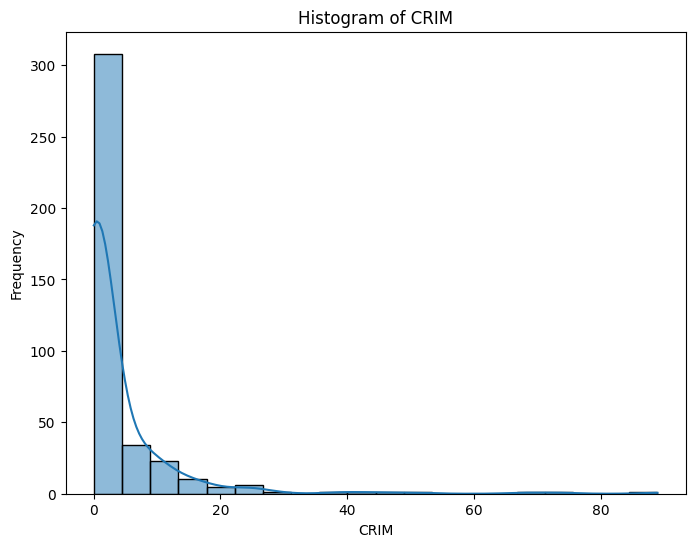

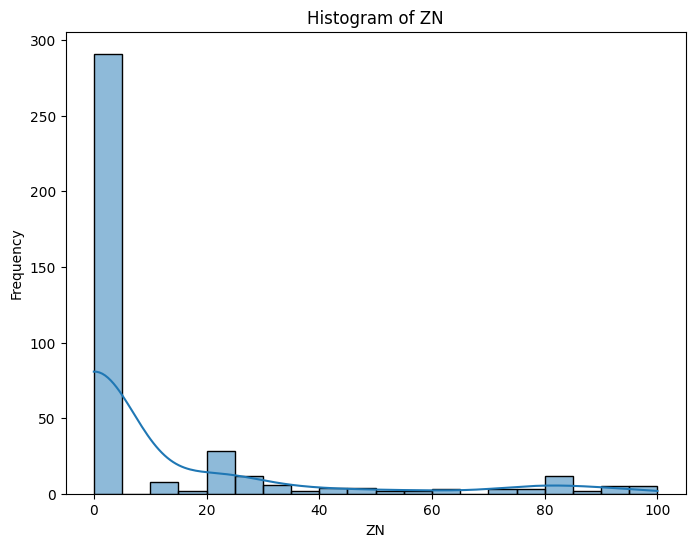

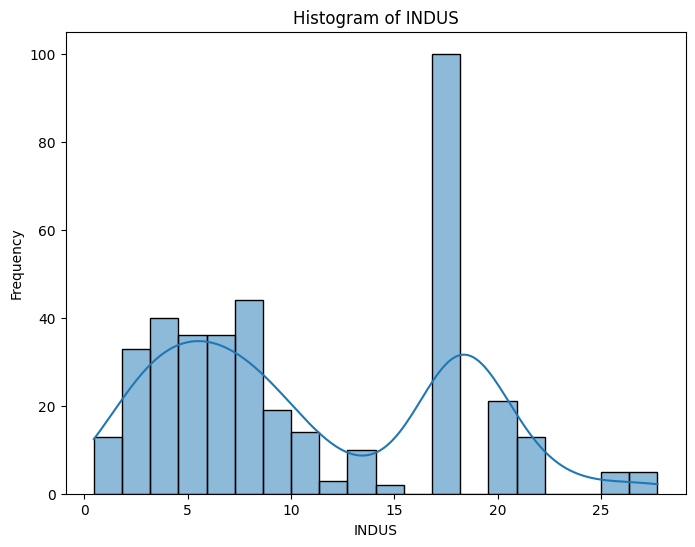

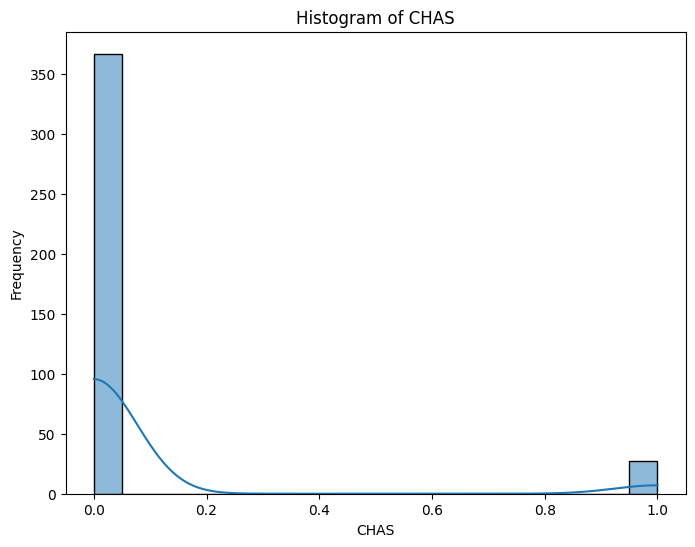

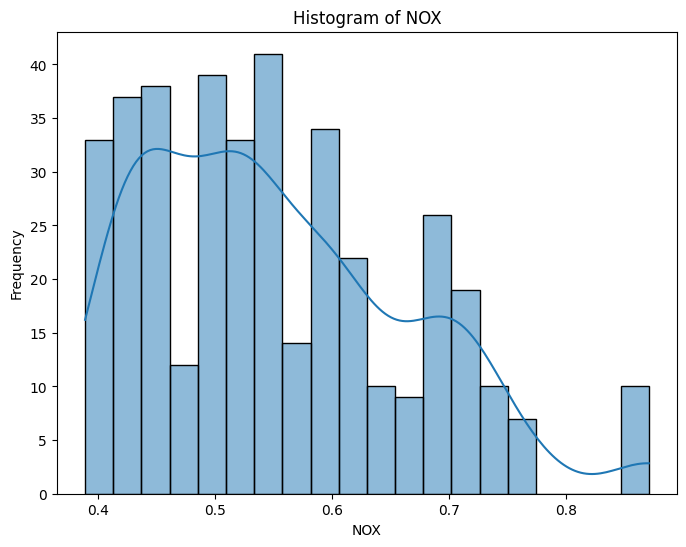

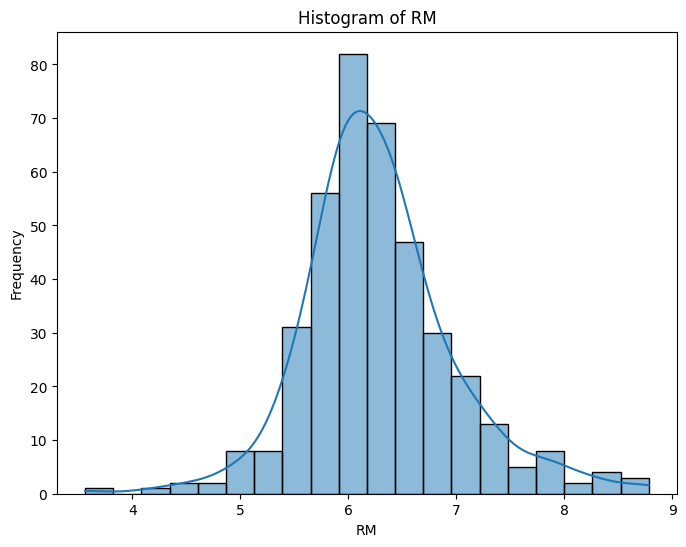

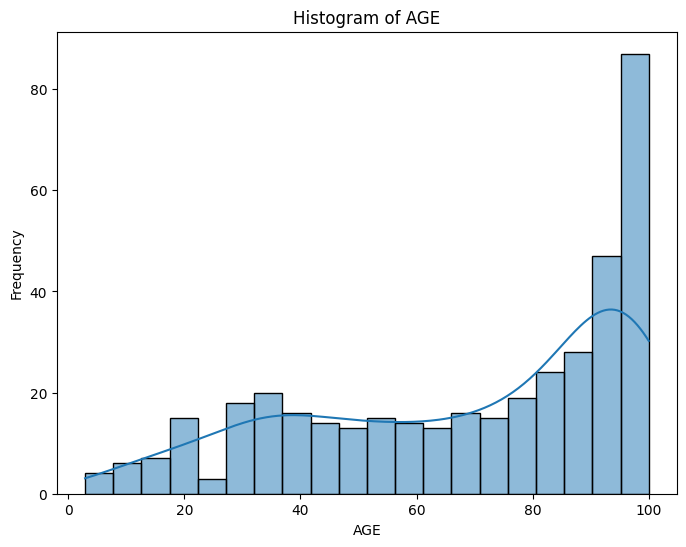

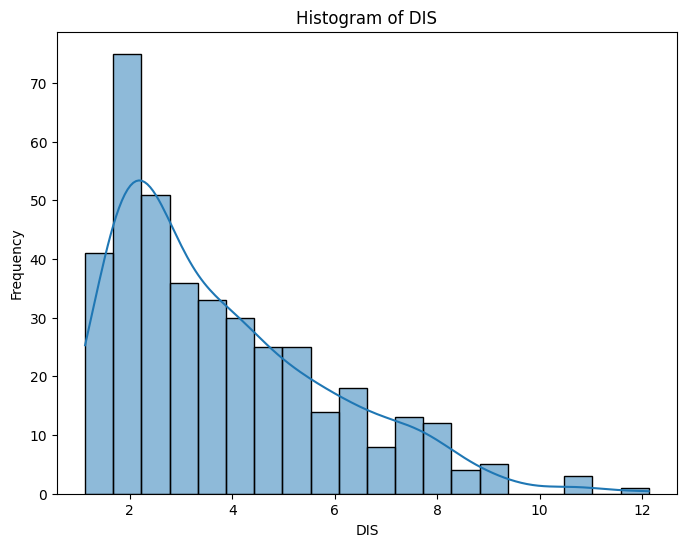

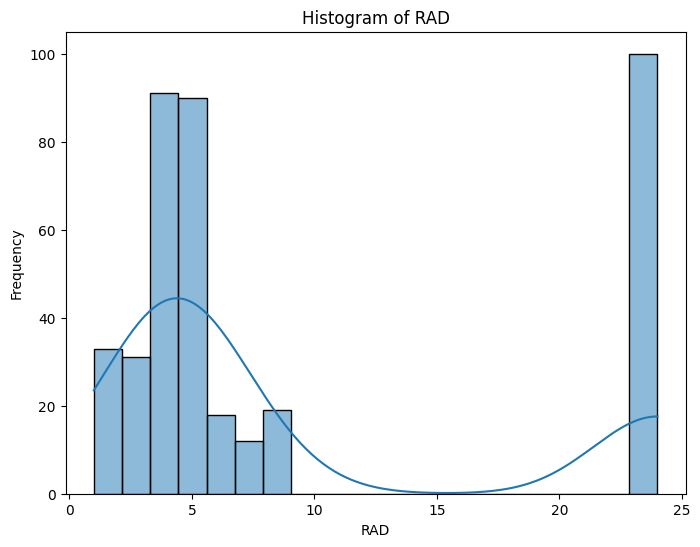

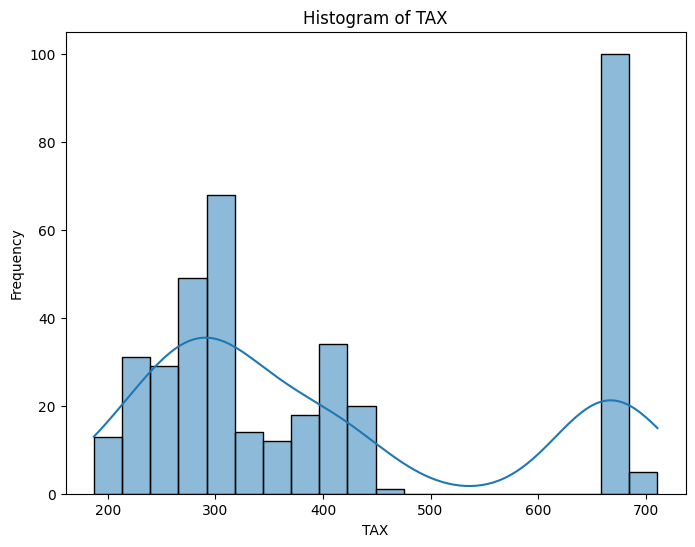

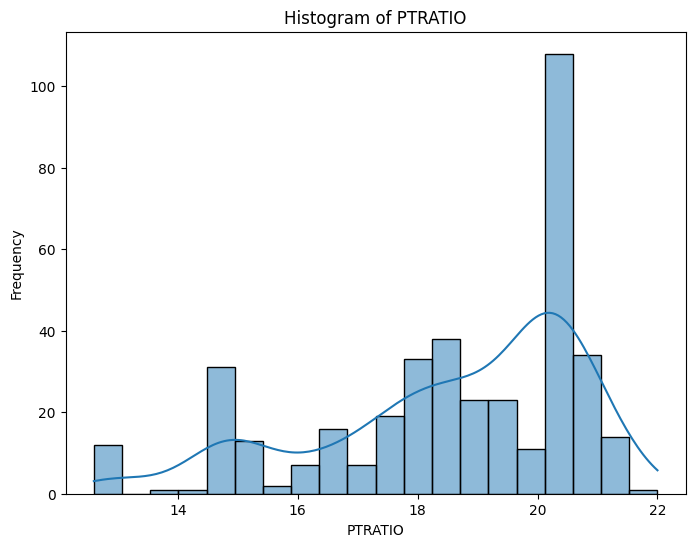

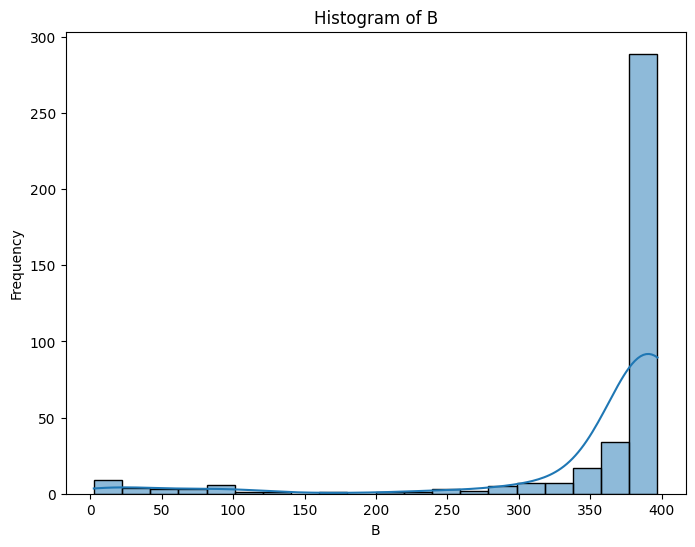

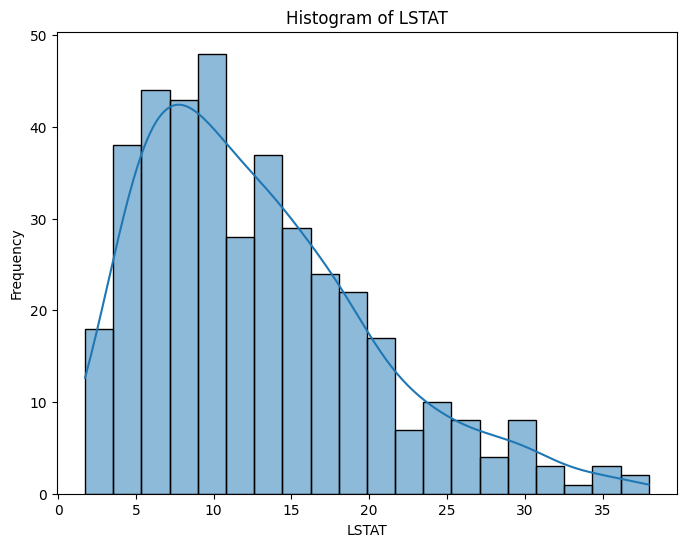

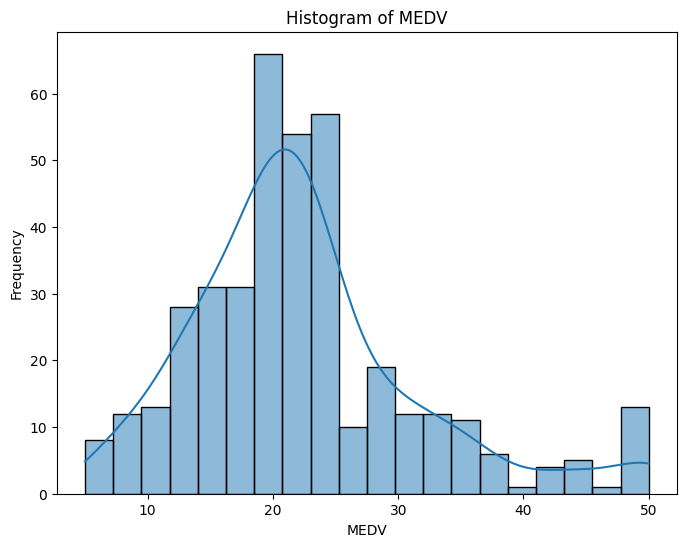

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from housing3 import feature_scaling

# Clean the data (remove rows with missing values)
cleaned_data = boston.dropna()

# Perform feature scaling
scaled_data = feature_scaling(cleaned_data.values)

# Calculate summary statistics (mean, median, count)
def mean(numbers):
    if not numbers:
        raise ValueError("List of numbers cannot be empty")
    return sum(numbers) / len(numbers)

def median(numbers):
    if not numbers:
        raise ValueError("List of numbers cannot be empty")
    sorted_numbers = sorted(numbers)
    n = len(sorted_numbers)
    if n % 2 == 0:
        return (sorted_numbers[n // 2 - 1] + sorted_numbers[n // 2]) / 2
    else:
        return sorted_numbers[n // 2]

def count(numbers):
    return len(numbers)


# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(boston.head())

# Summary statistics of the numerical columns
print("\nSummary statistics of numerical columns:")
print(boston.describe())

summary_stats = {
    'Mean': [mean(column) for column in zip(*scaled_data)],
    'Median': [median(column) for column in zip(*scaled_data)],
    'Count': [count(column) for column in zip(*scaled_data)]
}

# Print summary statistics
print("Summary Statistics:")
for feature, stats in summary_stats.items():
    print(f"{feature}: {stats}")

# Additional EDA - Data Distribution Visualization
def plot_histogram(data, feature_name):
    plt.figure(figsize=(8, 6))
    sns.histplot(data, bins=20, kde=True)
    plt.title(f'Histogram of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.show()

# Visualize data distribution using histograms for each feature
for feature_name in cleaned_data.columns:
    plot_histogram(cleaned_data[feature_name], feature_name)


First few rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  

Summary statistics of numerical columns:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.921051

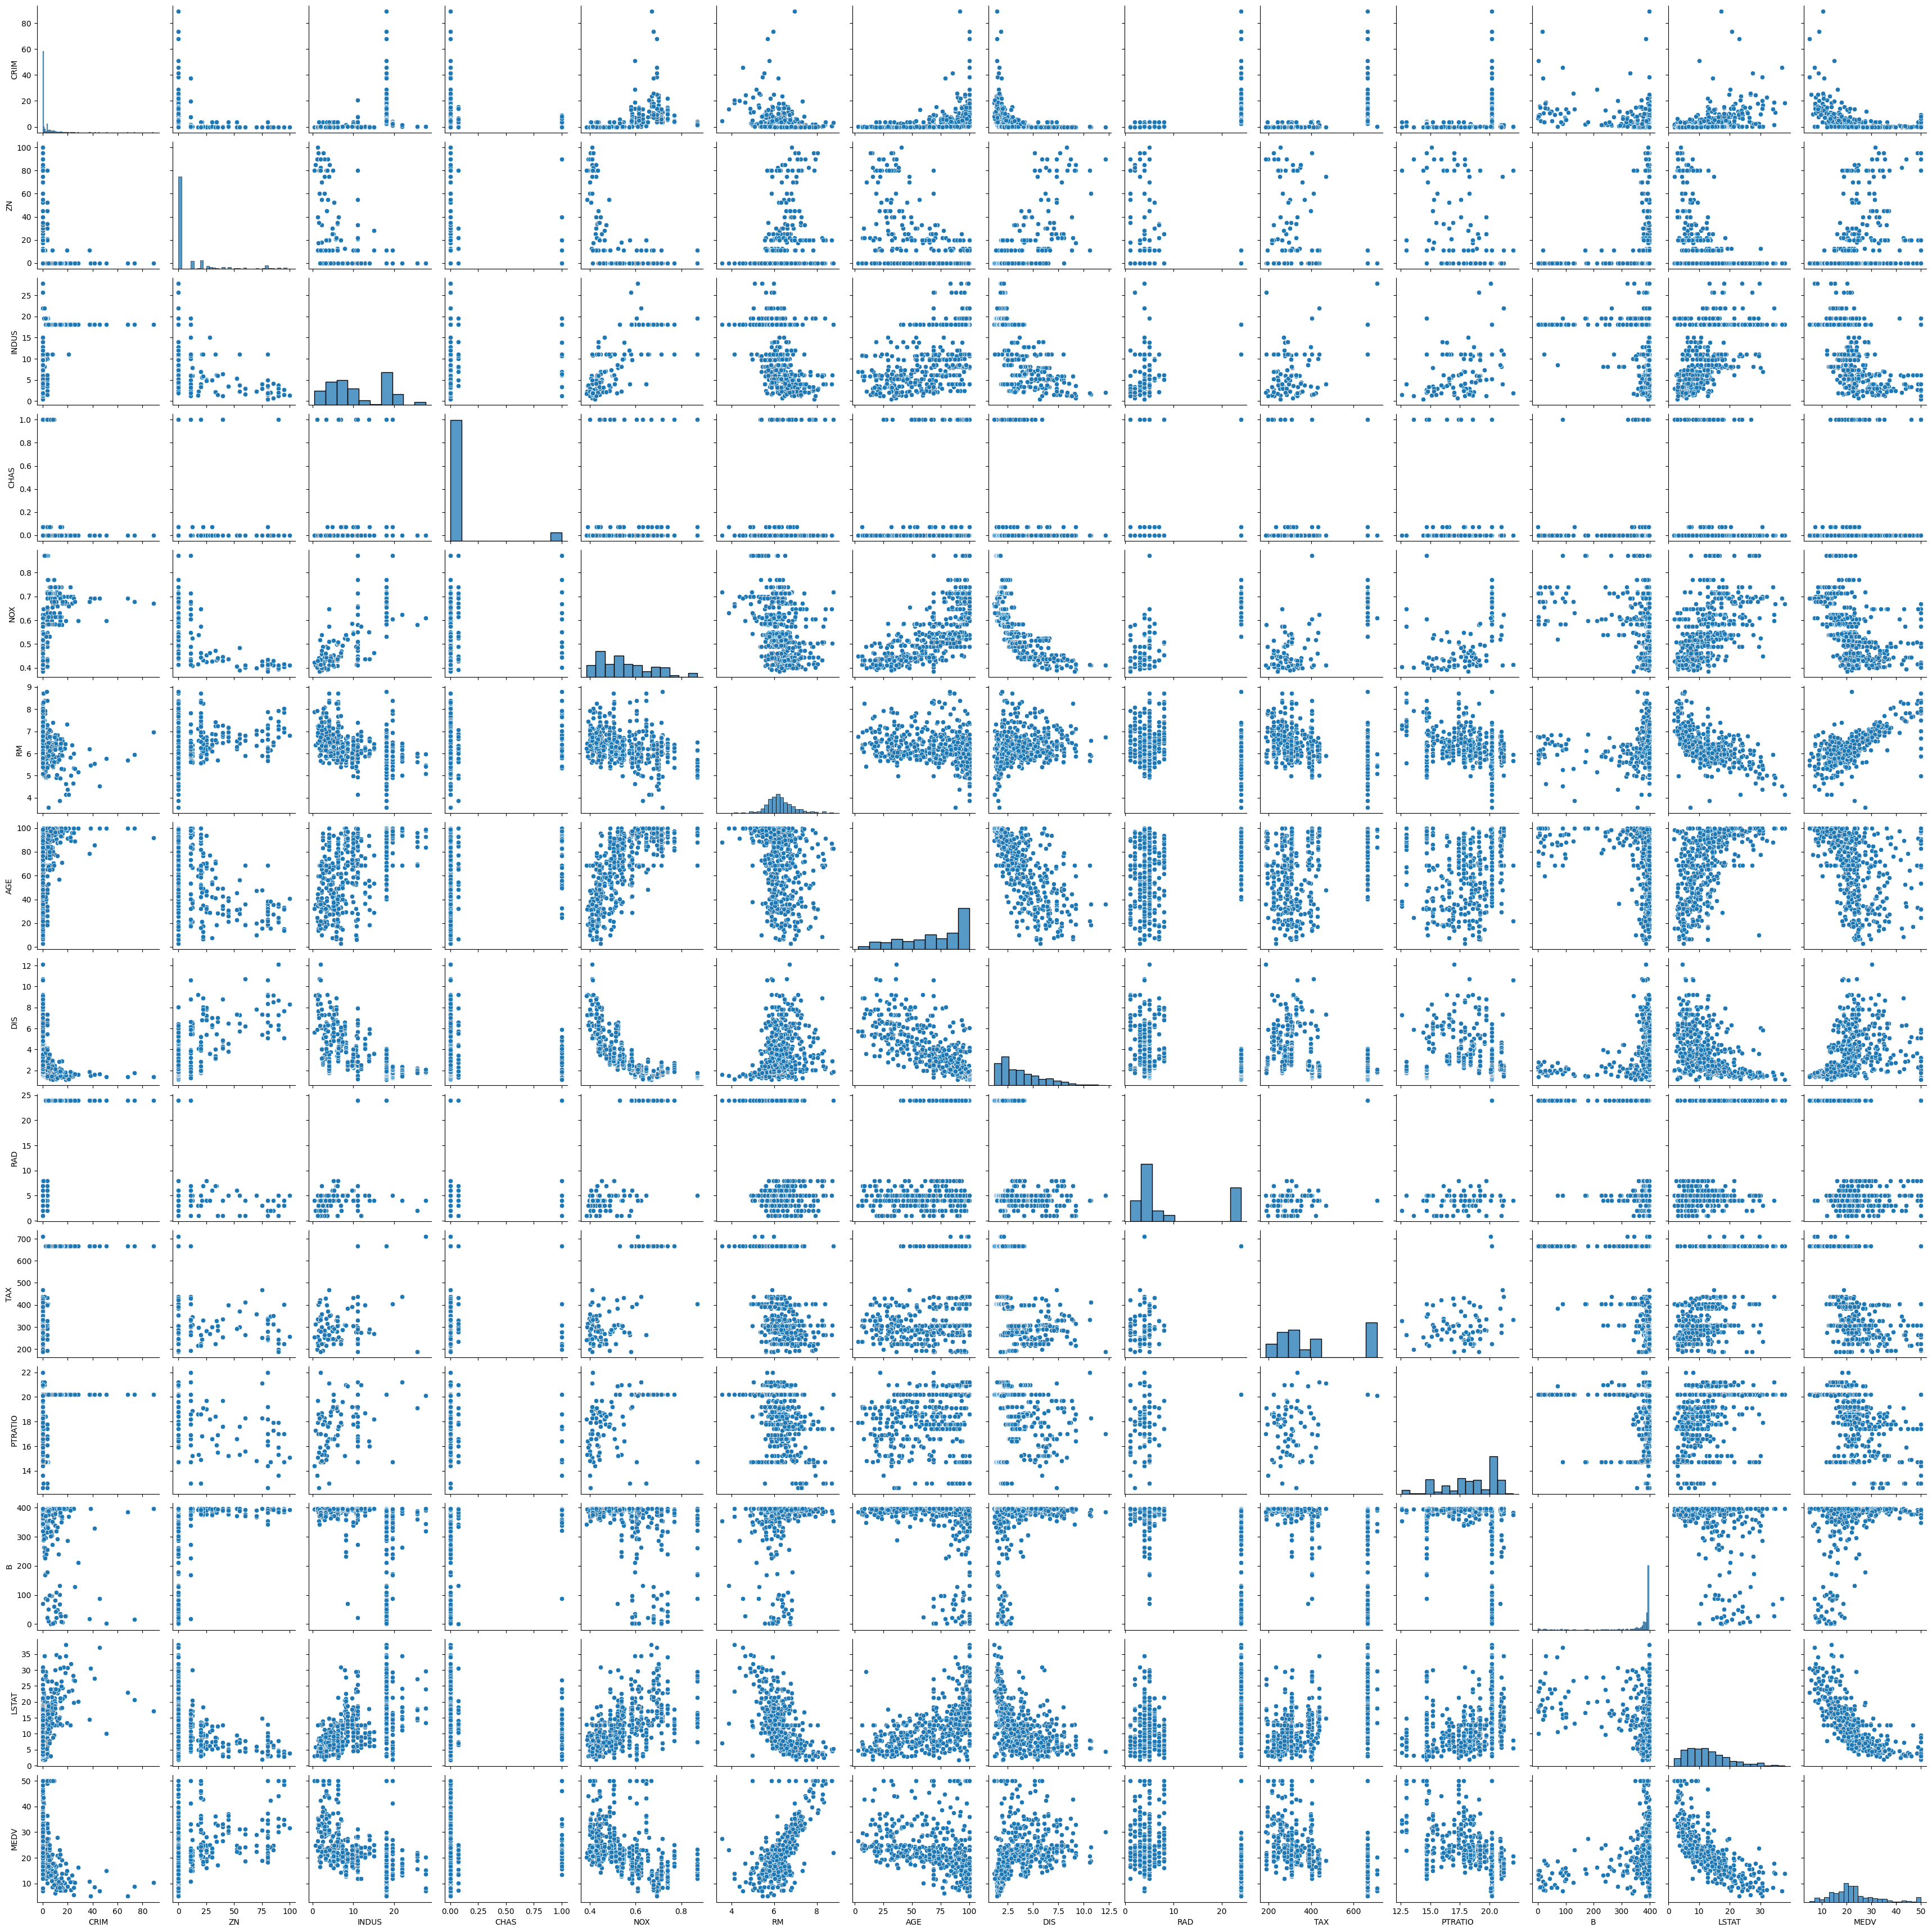


Correlation heatmap:


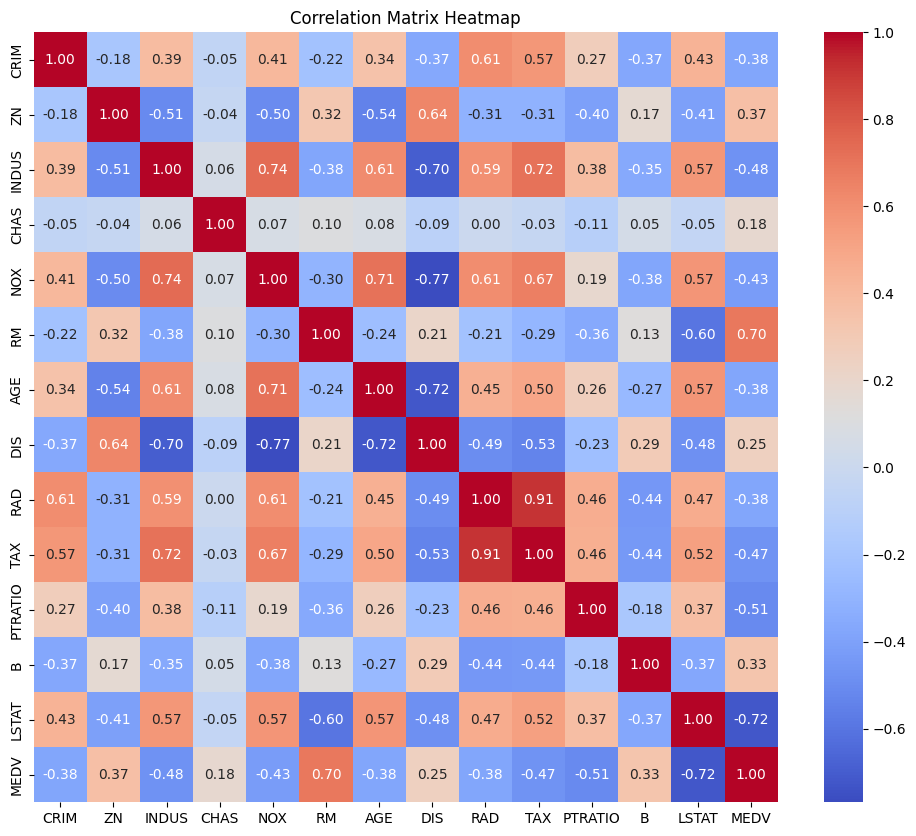


Histograms of numerical columns:


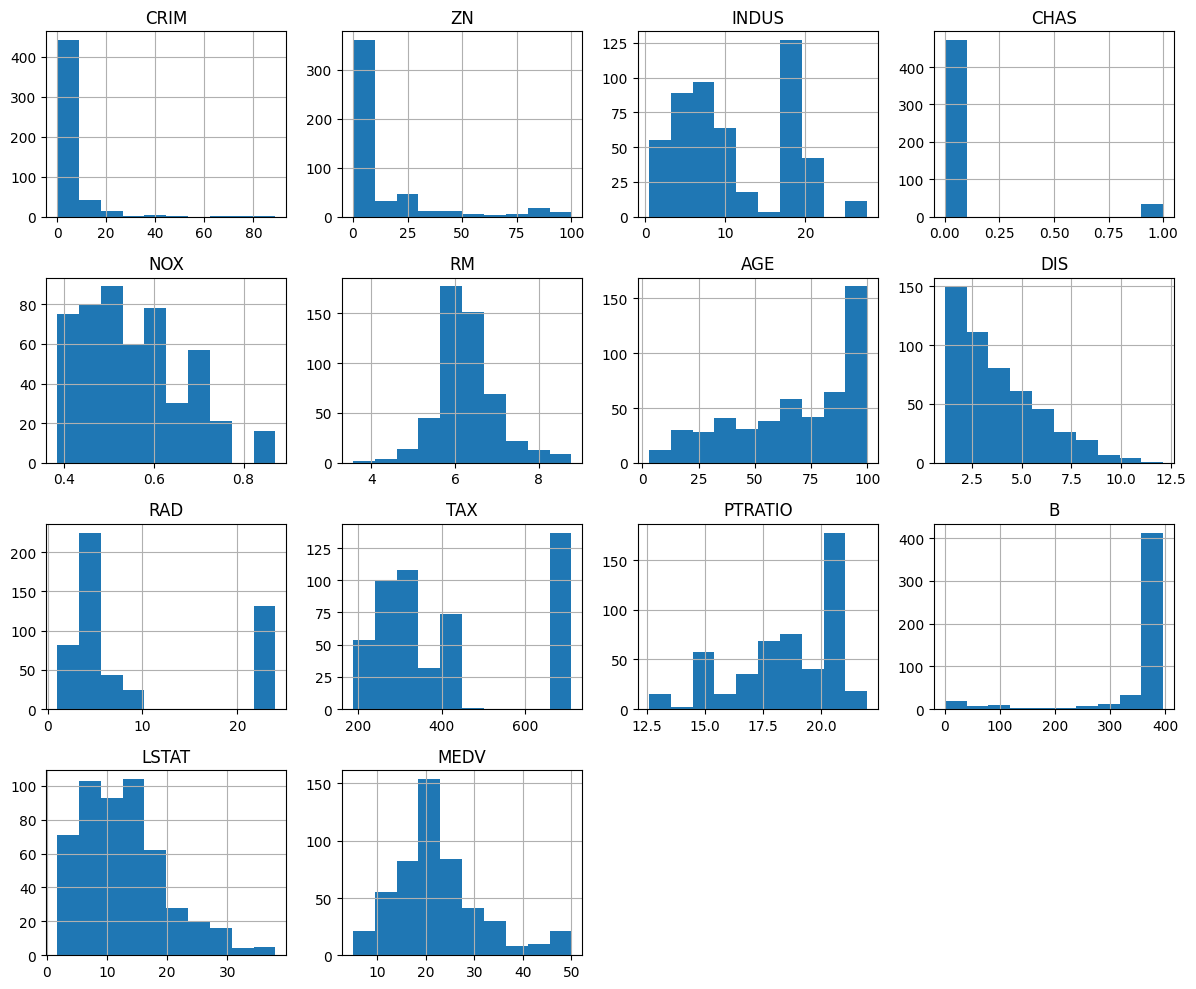


Boxplots of numerical columns:


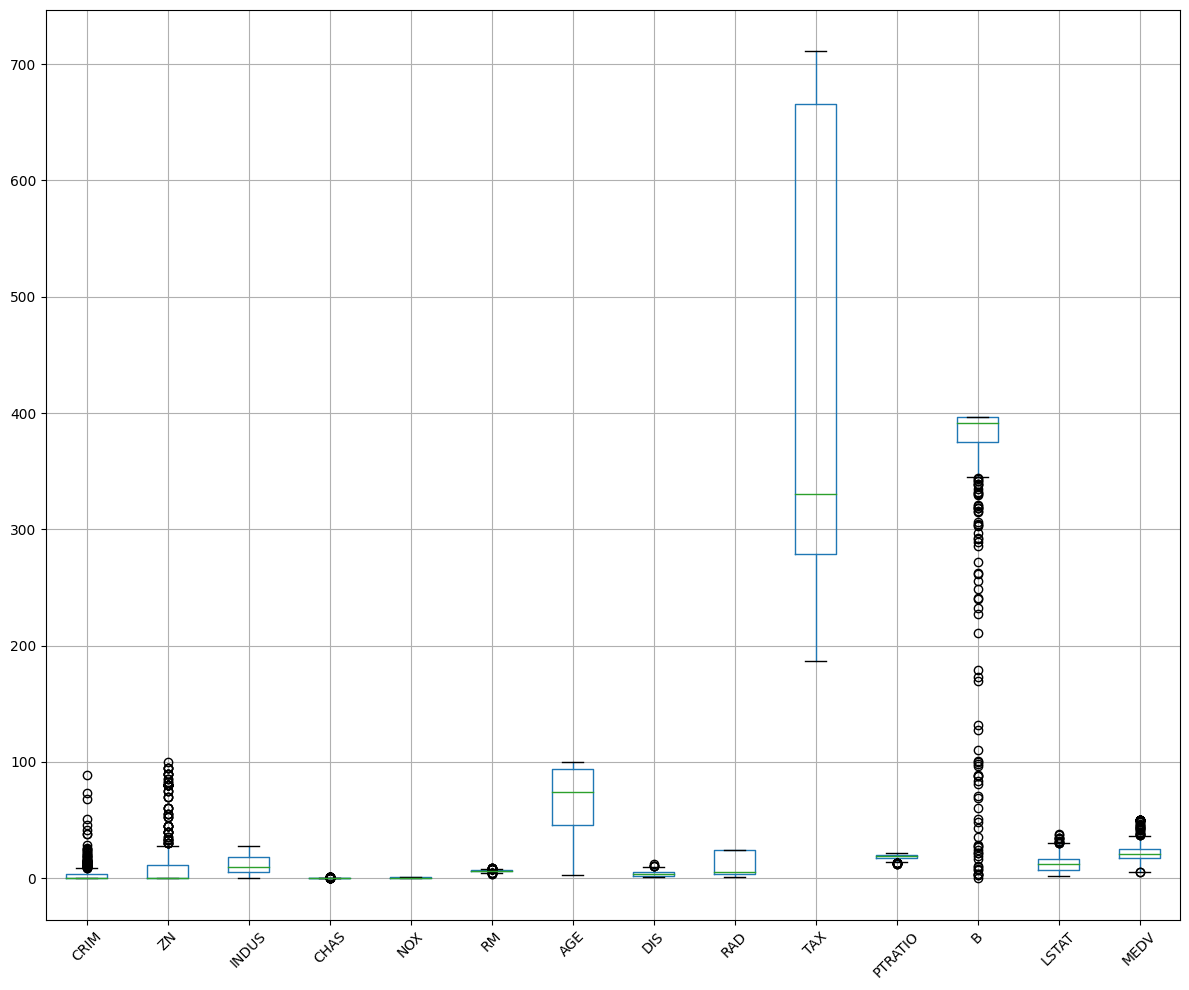

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the imputed dataset
boston_imputed = pd.read_csv('ImputedDataset.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(boston_imputed.head())

# Summary statistics of the numerical columns
print("\nSummary statistics of numerical columns:")
print(boston_imputed.describe())

# Pairplot for visualizing relationships between variables
print("\nPairplot for visualizing relationships between variables:")
sns.pairplot(boston_imputed)
plt.show()

# Correlation heatmap
print("\nCorrelation heatmap:")
plt.figure(figsize=(12, 10))
sns.heatmap(boston_imputed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Histograms of numerical columns
print("\nHistograms of numerical columns:")
boston_imputed.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Boxplots of numerical columns
print("\nBoxplots of numerical columns:")
plt.figure(figsize=(12, 10))
boston_imputed.boxplot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Pairplot for visualizing relationships between variables:


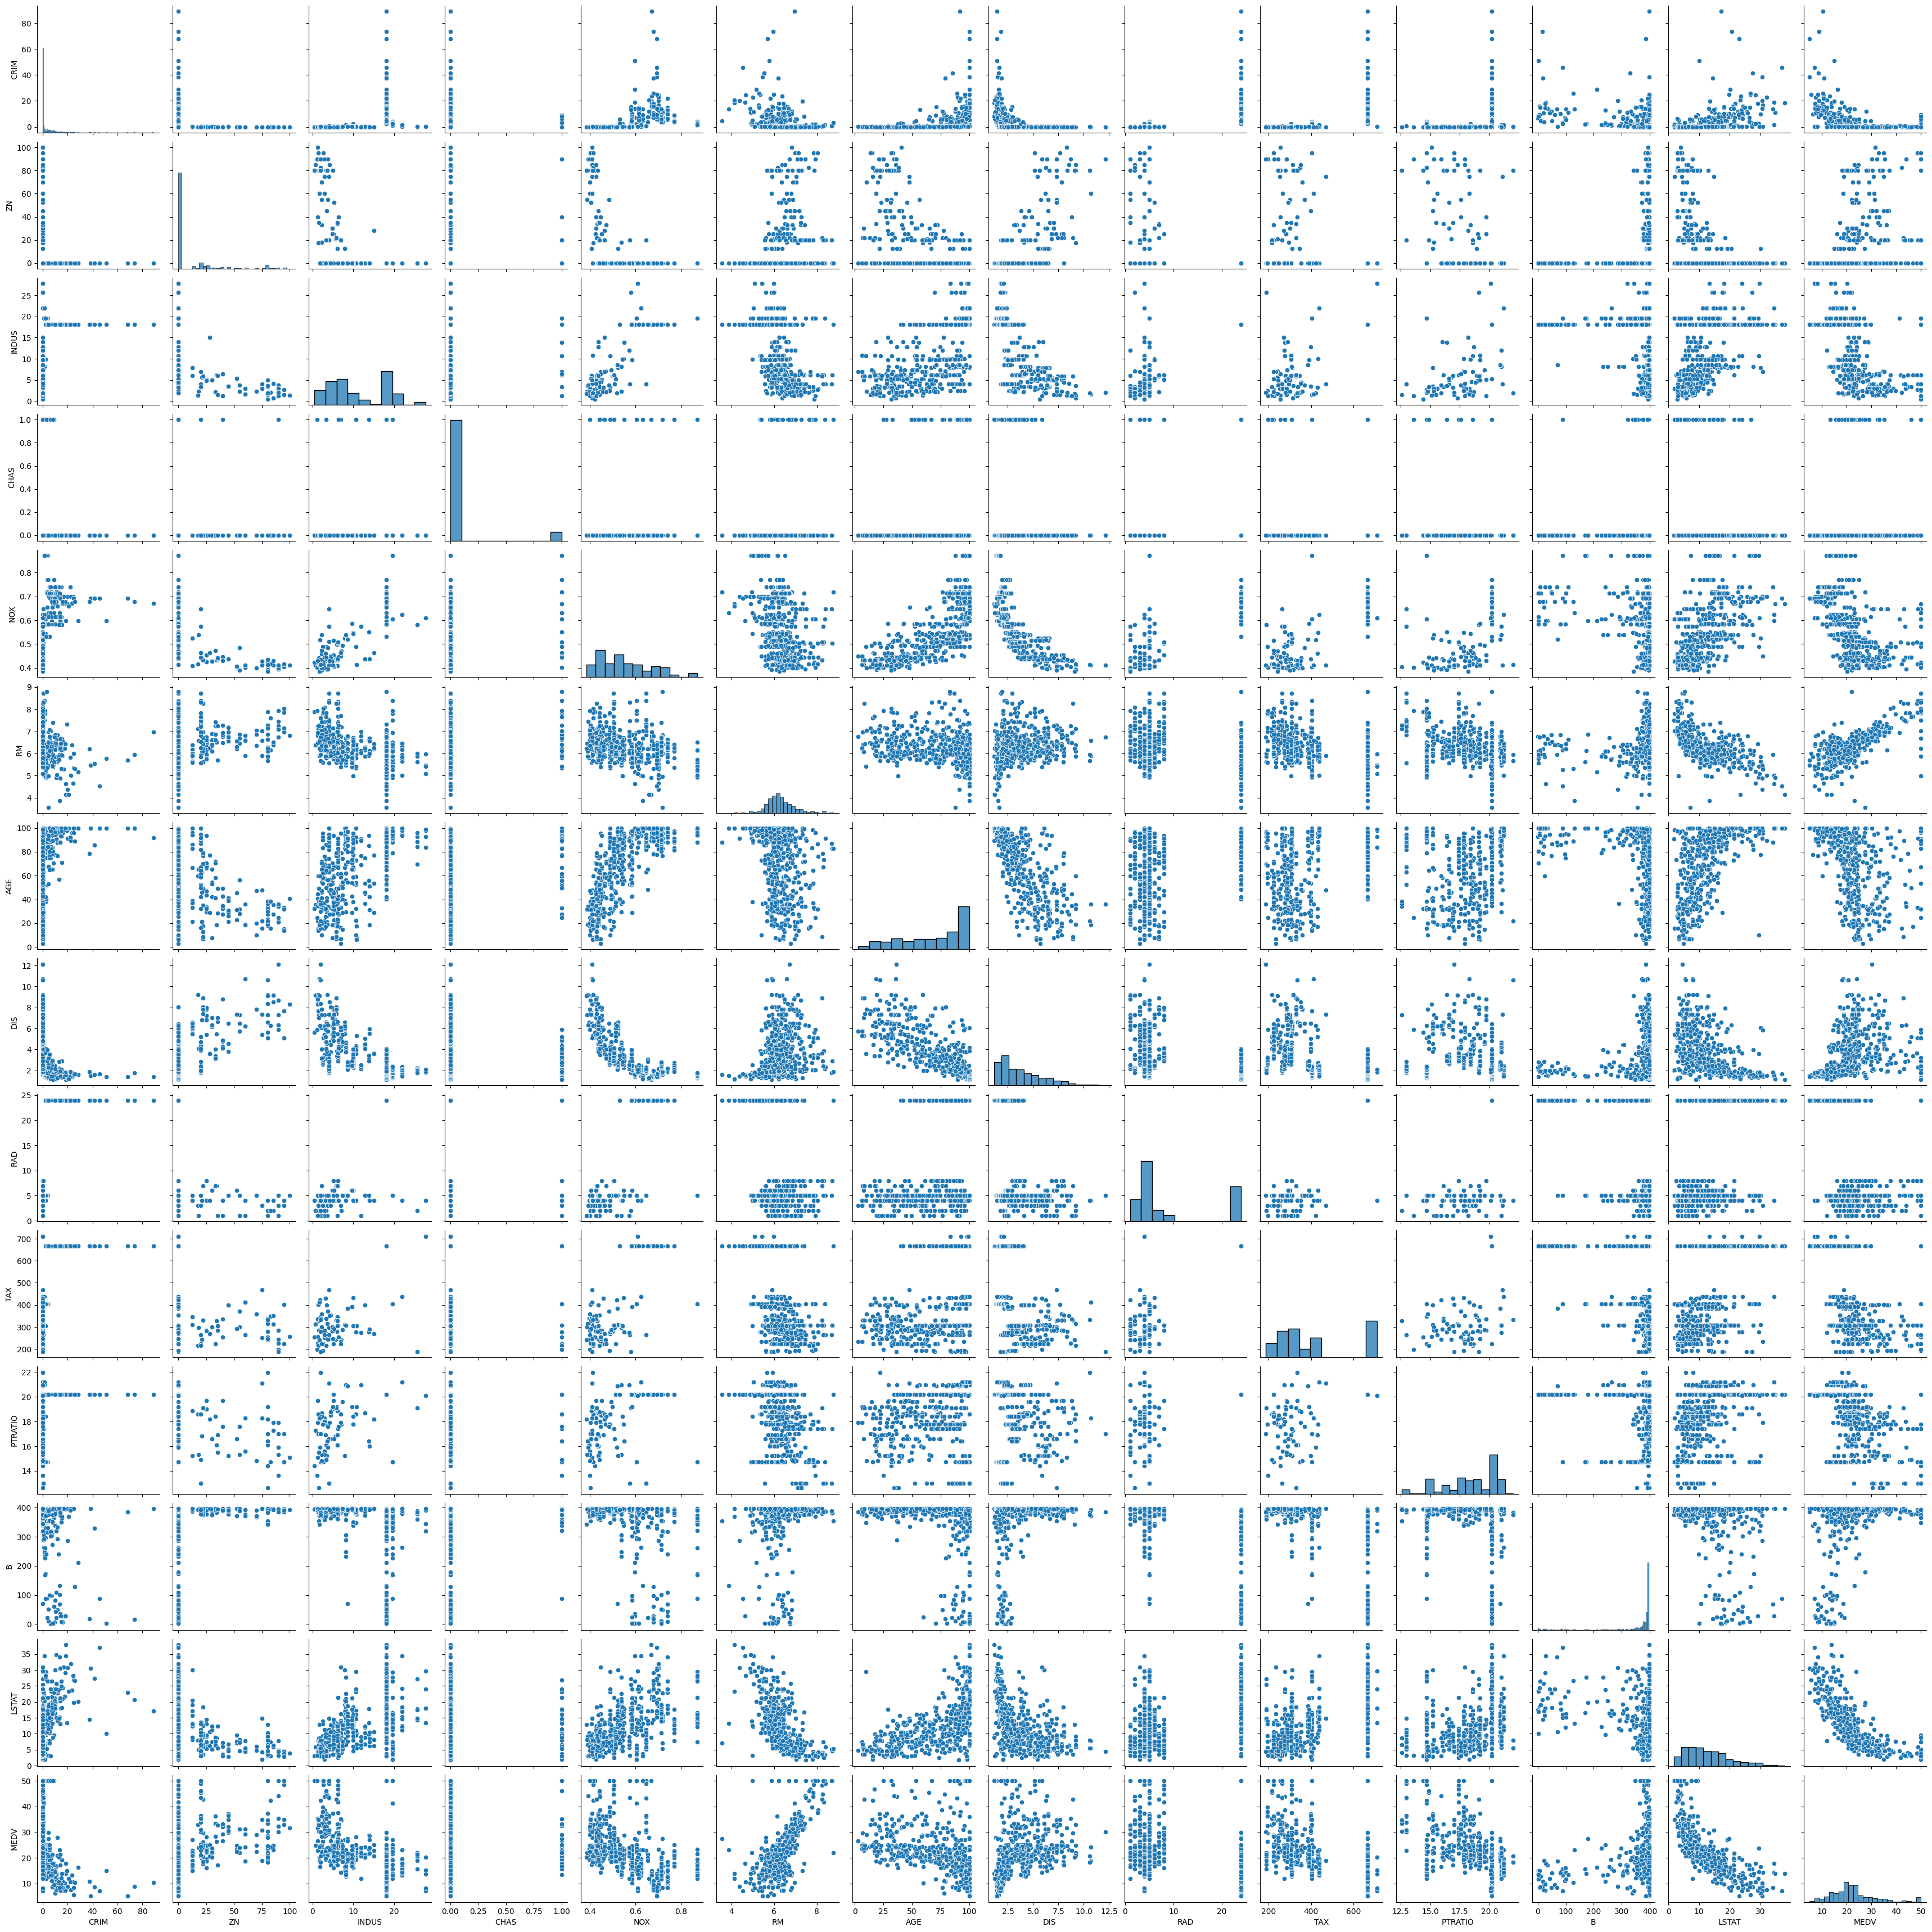


Correlation heatmap:


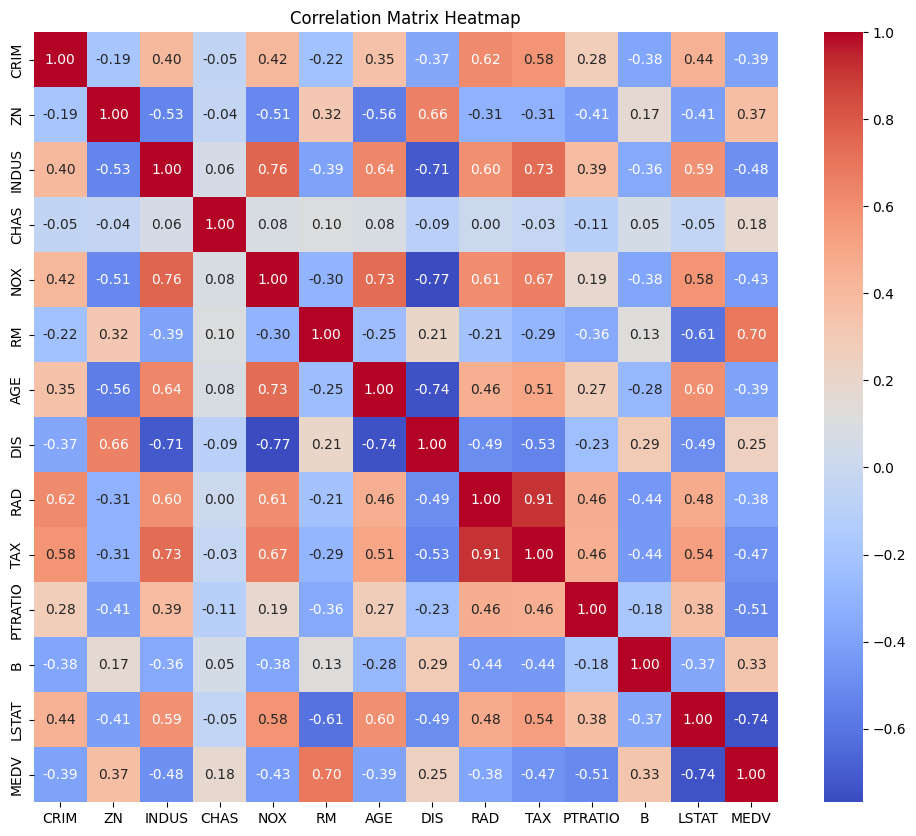


Histograms of numerical columns:


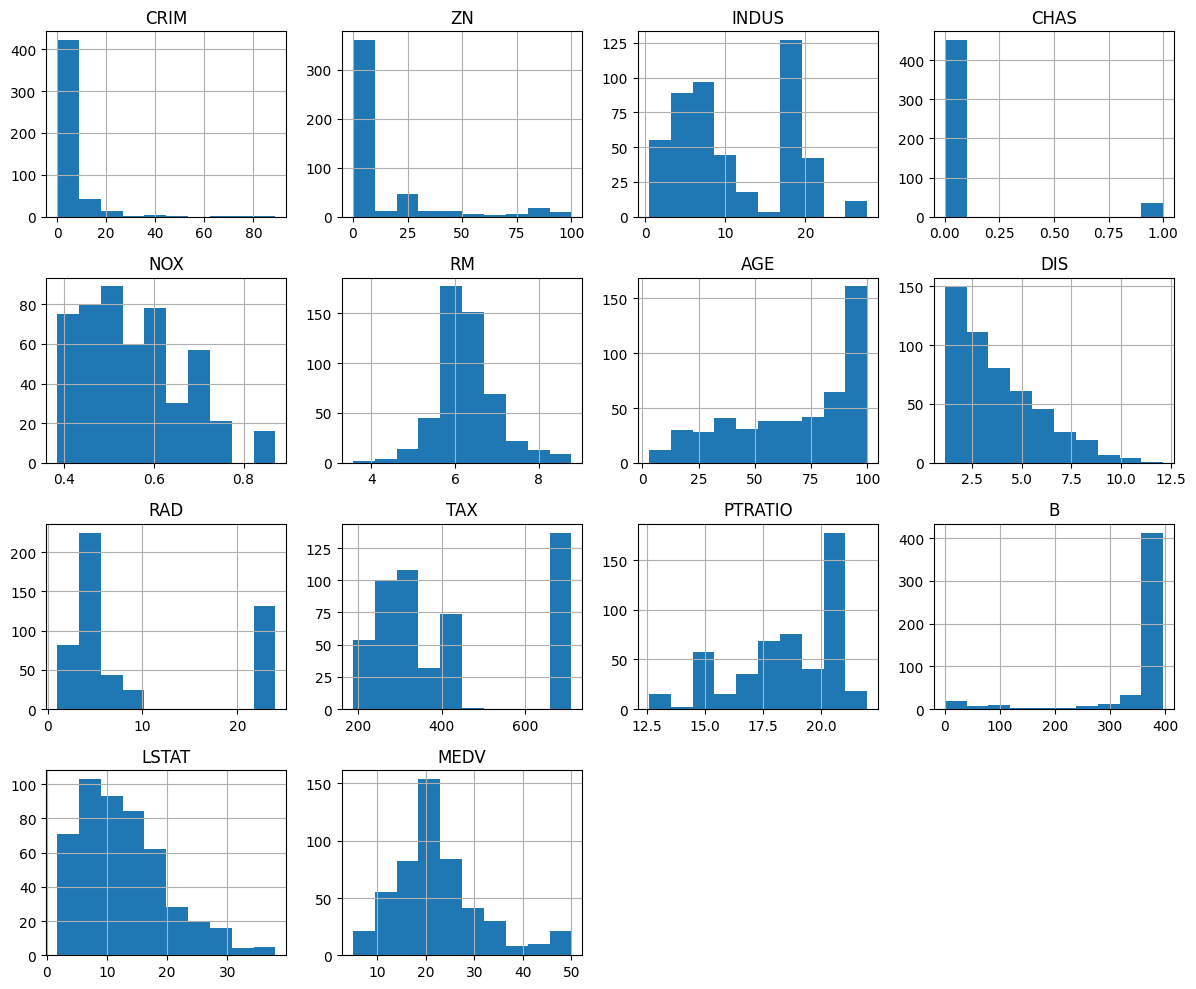


Boxplots of numerical columns:


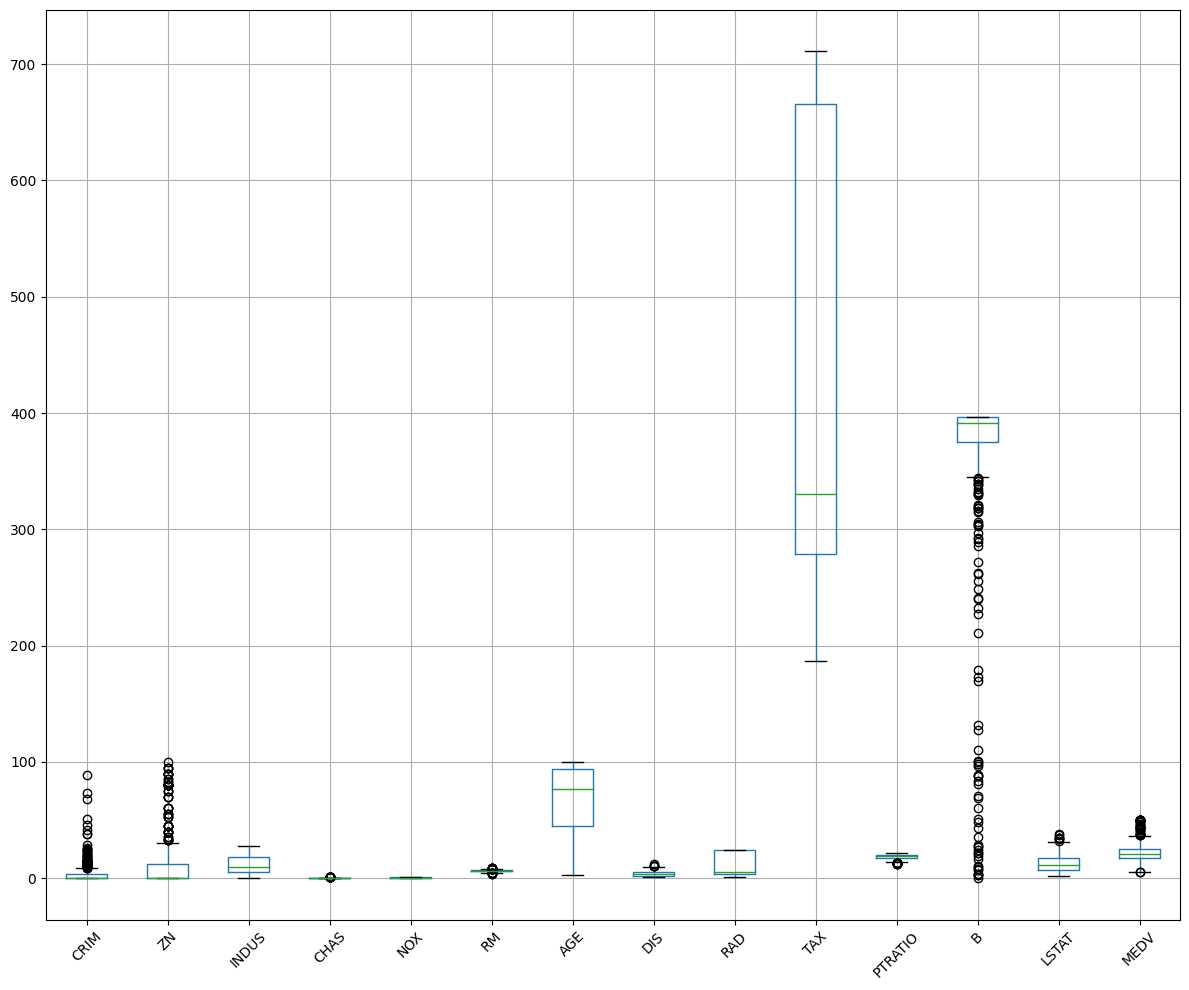

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Pairplot for visualizing relationships between variables
print("\nPairplot for visualizing relationships between variables:")
sns.pairplot(boston)
plt.show()

# Correlation heatmap
print("\nCorrelation heatmap:")
plt.figure(figsize=(12, 10))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Histograms of numerical columns
print("\nHistograms of numerical columns:")
boston.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Boxplots of numerical columns
print("\nBoxplots of numerical columns:")
plt.figure(figsize=(12, 10))
boston.boxplot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
import pandas as pd
from housing3 import feature_scaling, train_test_split, train_model, predict, evaluate
# Clean the data (remove rows with missing values)
cleaned_data = boston_imputed.dropna()

# Extract features and target variable
X = cleaned_data.drop('MEDV', axis=1)  # Dropping the target column 'MEDV'
y = cleaned_data['MEDV']

# Preprocess the data (scaling features)
scaled_data = feature_scaling(X.values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y.values)

# Debugging: Print intermediate results
print("X_train length:", len(X_train))
print("y_train length:", len(y_train))
print("X_test length:", len(X_test))
print("y_test length:", len(y_test))

# Train the model
model_params = train_model(X_train, y_train)

# Debugging: Print model parameters
print("Model Parameters:", model_params)

# Make predictions
predictions = predict(model_params, X_test)

# Debugging: Print predictions and actual values
print("Predictions:", predictions)
print("Actual Values:", y_test)

# Evaluate the model
rmse = evaluate(y_test, predictions)
print(f"Root Mean Squared Error: {rmse}")


X_train length: 405
y_train length: 405
X_test length: 101
y_test length: 101
Model Parameters: [-16687678.523662556, -16155789.825203523, -15852172.248746898, -15394980.891053723, -15668625.41211728, -15587736.664931547, -17031216.327182278, -17412470.906186156, -17423668.306761857, -17195027.341296755, -17368810.077342194, -17226016.242489506, -16667099.975299964]
Predictions: [-1471332260.2607577, -1381511830.2343397, -1345338056.7390661, -1349781204.1910093, -1255456641.6275918, -1115235818.4468997, -1160084895.6382525, -1174790489.4577026, -1328598752.7022374, -1289594114.2883701, -1171682978.759586, -1133469757.3858225, -1271958460.6783895, -1207911579.7488067, -1157632414.609322, -1349118559.7081828, -1334596350.4095848, -1322303499.720993, -1043227367.866081, -1042910552.6269202, -1112295585.6307607, -1063710750.2265716, -1195947812.3894494, -1193087047.4348333, -1159319114.7216682, -1167920240.4252286, -1200126453.847178, -1169882650.93282, -1192536409.8727708, -1218604101.069

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from housing3 import feature_scaling, train_model, predict, evaluate

# Clean the data (remove rows with missing values)
cleaned_data = boston_imputed.dropna()

# Extract features and target variable
X = cleaned_data.drop('MEDV', axis=1)  # Features
y = cleaned_data['MEDV']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using sklearn StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model using your library
model_params = train_model(X_train_scaled, y_train.values)

# Make predictions using your library
predictions = predict(model_params, X_test_scaled)

# Evaluate the model using your library
rmse = evaluate(y_test.values, predictions)
print(f"Root Mean Squared Error: {rmse}")

# Additional code for using sklearn LinearRegression for comparison
# Train Linear Regression model using sklearn
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate sklearn Linear Regression model
lr_rmse = evaluate(y_test.values, lr_predictions)
print(f"Sklearn Linear Regression RMSE: {lr_rmse}")


Root Mean Squared Error: 8777.264142005559
Sklearn Linear Regression RMSE: 5.00176689019419


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Clean the data (optional, if needed)
cleaned_data = boston_imputed.dropna()

# Extract features and target variable
X = cleaned_data.drop('MEDV', axis=1)  # Features
y = cleaned_data['MEDV']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Make predictions
predictions = tree_regressor.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Decision Tree RMSE: {rmse}")


Decision Tree RMSE: 3.415693309463501
